# Øvingsforelesning 8

## Repetisjonsoppgave

Lag funksjonen ```csv_to_dict(filename)``` som tar inn navnet på en fil på formatet
```
navn, nasjonalitet, alder, høyde
Håkon, Norge, 24, 188
Tobias, Russland, 40, 200
Magnus, Norge, 17,  162
```
der hver linje inneholder 4 elementer separert med komma.

Funksjonen skal returnere en dictionary der nøklene _(key)_ er elementene på første rad, og verdiene til hver nøkkel er elementene som følger under den respektive nøkkelen:
```
{
	‘navn’: 		[‘Håkon’, ‘Tobias’, ‘Magnus’],
	‘nasjonalitet’: 	[‘Norge’, ‘Russland’, ‘Norge’],
	‘alder’: 		[24, 40, 17],
	‘høyde’: 		[188, 200, 162]
}
```

In [26]:
# Din kode her

def csv_to_dict(filename):
    try:
        with open(filename, 'r') as file:
            lines = file.readlines()
            d = {}
            for key in lines[0].split(','):
                d[key.strip()] = []
            for line in lines[1:]:
                values = line.split(',')
                i = 0
                for key in d.keys():
                    d[key].append(values[i].strip())
                    i += 1
            return d
    except:
        print("Could not open file.")

csv_to_dict("vitasser.csv")

Could not open file.


## Oppgave 1 - Numpy

__a)__ Opprett en numpy-array med 100 elementer fra og med 0 til og med 200

__b)__ Opprett en numpy-array fra og med 1000 til 0 med 0.3 i steglengde
* Hvor mange elementer er det i arrayet?

__c)__ Lag en funksjon som sjekker om to vektorer (arrays) står vinkelrett på hverandre
* **Hint:** ```np.dot(arr1, arr2)```
* **Hint:** To vektorer er vinkelrette om prikkproduktet mellom dem er lik 0
* Funksjonen skal kun fungere om vektorene er like lange. _np.dot()_ kaster et unntak hvis ```len(arr1) != len(arr2)```. Bruk unntakshåndtering for å sørge for at programmet ikke gir feilmelding.


In [33]:
# Din kode her

import numpy as np

arr1 = np.linspace(0,200,100)
arr2 = np.arange(1000,0, -0.3)

print(arr1)
print(len(arr2))

def is_orthogonal(vec1, vec2):
    try:
        dot = np.dot(vec1, vec2)
        return dot == 0
    except:
        print("The vectors must be the same dimensions!")

is_orthogonal([1,0,0], [0,1,0])


[  0.           2.02020202   4.04040404   6.06060606   8.08080808
  10.1010101   12.12121212  14.14141414  16.16161616  18.18181818
  20.2020202   22.22222222  24.24242424  26.26262626  28.28282828
  30.3030303   32.32323232  34.34343434  36.36363636  38.38383838
  40.4040404   42.42424242  44.44444444  46.46464646  48.48484848
  50.50505051  52.52525253  54.54545455  56.56565657  58.58585859
  60.60606061  62.62626263  64.64646465  66.66666667  68.68686869
  70.70707071  72.72727273  74.74747475  76.76767677  78.78787879
  80.80808081  82.82828283  84.84848485  86.86868687  88.88888889
  90.90909091  92.92929293  94.94949495  96.96969697  98.98989899
 101.01010101 103.03030303 105.05050505 107.07070707 109.09090909
 111.11111111 113.13131313 115.15151515 117.17171717 119.19191919
 121.21212121 123.23232323 125.25252525 127.27272727 129.29292929
 131.31313131 133.33333333 135.35353535 137.37373737 139.39393939
 141.41414141 143.43434343 145.45454545 147.47474747 149.49494949
 151.51515

## Oppgave 2 - Matplolib og Filbehandling

*En stor norsk avis planlegger en reportasje om covid-19-pandemien der overskriften skal ha store, røde bokstaver: "DU VIL IKKE TRO HVOR MYE DENNE GRAFEN KOMMER TIL Å SJOKKERE DEG".*

*I den forbindelsen har de gitt deg filen `covid-cases.csv` som inneholder informasjon om nye og totale tilfeller av covid-19 i Norge per dag fra og med 01.01.2020 til og med 02.11.2021*

Filen ser slik ut:
```
Dato,Nye tilfeller,Totale tilfeller
2020-01-01;0;0
2020-01-02;0;0
2020-01-03;0;0
2020-01-04;0;0
...
...
2021-10-28;1137;205561
2021-10-29;1164;206725
2021-10-30;603;207328
2021-10-31;681;208009
2021-11-01;1890;209899
2021-11-02;832;210731
```

Filen inneholder altså først en linje med kolonnenavn: `Dato,Nye tilfeller,Totale tilfeller`.
De følgende linjene inneholder informasjon, som f.eks `2020-10-27,676,17908` som vil si at på datoen 27.10.2020 ble det registrert 676 nye tilfeller, og at totalen av registrerte smittede dermed ble 17908 fra utbruddets begynnelse.

**Oppgaver:**<br>
1. Lag en funksjon `get_x_y(filename)` som returnerer to lister, `x` og `y`, hvor `x` er antall dager siden første dato i filen og `y` inneholder totale tilfeller per dag.<br>
**Hint:** `file = open(filename, 'r')`, `file.readlines()` <br><br>
2. Lag en funksjon `plot_data(x,y)` som plotter en graf med `x`-listen på x-aksen `y`-listen på y-aksen<br>
**Hint:** `plt.plot(x,y)`, `plt.show()`<br><br>
3. Test funksjonene ved å plotte dager på x-aksen og tilfeller på y-aksen fra filen `covid-cases.txt` <br>

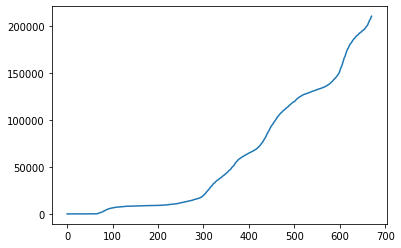

In [55]:
# Din kode her

import matplotlib.pyplot as plt

def get_x_y(filename):
    x, y = [], []
    with open(filename, 'r') as file:
        day = 0
        for line in file.readlines()[1:]:
            lst = line.strip().split(';')
            tot = int(lst[-1])
            x.append(day)
            y.append(tot)
            day += 1
    return x, y

x,y = get_x_y("covid-cases.csv")

def plot_data(x,y):
    plt.plot(x,y, '-')
    plt.show()

plot_data(x,y)


## Eksamensoppgave
### Høst 2015, Oppgave 4

__4c)__ 

Sensor retter eksamen og setter poeng på hver oppgave med en poengsum som går fra og med 0 til og
med 10, der 0 er dårligst (0% score) mens 10 er best (100% score). Sensur av en eksamen består av
en liste med ett tall for hver deloppgave, i samme rekkefølge som de kommer (dvs. 1,2a,2b, osv.)

Lag funksjonen ```computeScore(Points, WEIGHTS)``` med inn-parameteren ```Points``` som er en liste med poengsummer for
deloppgavene, og konstanten ```WEIGHTS``` (utdelt). Funksjonen skal regne ut en totalscore i
prosent for en eksamen, basert på vektingen av oppgavene.

Eksempel på kjøring av funksjonen og hva den returnerer:
```
>>> computeScore([10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10],WEIGHTS)
100.0
>>> computeScore([10,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0],WEIGHTS)
45.0
>>> computeScore([5,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0],WEIGHTS)
32.5
>>> computeScore([4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],WEIGHTS)
40.0
```

In [60]:
WEIGHTS = (25, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5)

score1 = [10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
score2 = [10,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0]
score3 = [5,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0]
score4 = [4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4]

# Din kode her
def computeScore(Points, WEIGHTS):
    tot = np.dot(Points, WEIGHTS)
    return tot/10

computeScore(score4, WEIGHTS)

40.0

__4e)__

Skriv en funksjon ```addCandidate(candidateNumber, Scores, WEIGHTS)``` som tar inn tre parametere: ```candidateNumber```, ```Scores``` (en liste), og konstanten ```WEIGHTS```. Funksjonen skal legge til følgende (adskilt med __tabulator__ (```'\t'```)) som en linje på slutten av en fil med navn *'eksamen.txt'*:

```candidateNumber``` kommer først på linjen, så alle del-poengsummene fra Scores, og til slutt den prosentvise scoren med __én desimals__ nøyaktighet og et linjeskift. Dersom fila ikke finnes, skal den opprettes. Dersom den ikke kan opprettes skal funksjonen avsluttes med Python’s systemgenererte (default) feilmelding .

Eksempel på kjøring av funksjonen og hva den returnerer:
```
>>> addCandidate(12392,[10,0,0,0,10,10,10,10,10,0,0,0,0,0,0,0],WEIGHTS)
>>> addCandidate(33322,[0,10,10,10,0,0,0,0,0,10,10,10,10,10,10,10],WEIGHTS)
```
```
# Etter at minnepinnen som inneholder fila er fjernet…
>>> addCandidate(12492,[0,10,10,10,0,0,0,0,0,10,10,10,10,10,10,10],WEIGHTS)
[Errno 2] No such file or directory: 'eksamen.txt'
```
```
# Innholdet i filen eksamen.txt på minnepenna er nå:
12392 10 0 0 0 10 10 10 10 10 0 … 0 50.0
33322 0 10 10 10 0 0 0 0 0 10 … 10 50.0
```

In [63]:
# Din kode her
def addCandidate(candidateNum, Scores, WEIGHTS):
    with open('eksamen.txt', 'a') as file:
        line = str(candidateNum)
        for s in Scores:
            line += f'\t{s}'
        line += f"\t{round(computeScore(Scores, WEIGHTS),1)}"
        file.write(line+'\n')

addCandidate(12392,[10,0,0,0,10,10,10,10,10,0,0,0,0,0,0,0],WEIGHTS)
addCandidate(33322,[0,10,10,10,0,0,0,0,0,10,10,10,10,10,10,10],WEIGHTS)

__4f)__

Skriv en funksjon ```readResultFile(filename)``` som har en inn-parameter ```filename```. Funksjonen skal lese
innholdet i fila med navn _filename_ som er formatert som beskrevet i Oppgave 4 e) og legge innholdet
i en __to-dimensjonal__ liste der hver rekke inneholder kandidatnummer, alle del-poengsummene og den
prosentvise scoren. Kandidatnummer og del-poengsummene skal være av typen heltall, mens den
prosentvise scoren skal være av typen flyttall. 

Funksjonen trenger ikke å håndtere feil som at filen ikke finnes eller filen ikke kan åpnes.

Eksempel på kjøring med fila ”eksamen.txt” med innhold som i Oppgave 4e):
```
>>> Table=readResultFile('eksamen.txt')
>>> print(Table)
[[12392, 10, 0, 0, 0, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 50.0],
[33322, 0, 10, 10, 10, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 50.0]]
```

In [66]:
# Din kode her
def readResultFile(filename):
    tab = []
    with open(filename, 'r') as file:
        for line in file.readlines():
            line_lst = line.strip().split('\t')
            row = []
            for i in range(len(line_lst)):
                if i == (len(line_lst)-1):
                    row.append(float(line_lst[i]))
                else:
                    row.append(int(line_lst[i]))
            tab.append(row)
    return tab
readResultFile('eksamen.txt')

[[12392, 10, 0, 0, 0, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 50.0],
 [33322, 0, 10, 10, 10, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10, 50.0]]